<a href="https://colab.research.google.com/github/Ali-Shabanpour/Google-Colab/blob/main/ML403/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=141BJVwtPjNAL1F8yasImXWT9JA3ZjszY" width="500"><br><br>
  <img src="https://drive.google.com/uc?export=view&id=1Kxqq1-kCQb2xC0WDAchliOa4oVO24bc_" width="400">

<br>
<font color="5acfee" size="6">پاسخ تمرین اول یادگیری ماشین</font><br>
<font color="5acfee" size="5">نگارش: علی شعبانپور مقدم - هدیه شوشیان</font><br>
<font color="5acfee" size="5">شماره دانشجویی: 40207304-40308054</font><br>
<font color="5acfee" size="5">استاد درس: دکتر مهدی علیاری شوره دلی</font><br>
<font color="5acfee" size="5">زمستان 1403</font>

</div>


#3rd Question

##Ⅰ CWRU Dataset


$$\large \text{part a:} \hspace{110mm} \large \text{:بخش آ}$$
$$\large \text{Downloading Dataset} $$
First we download the dataset from [this](https://engineering.case.edu/bearingdatacenter/48k-drive-end-bearing-fault-data) page.
In order to run the code by everyone, we should put it in google drive with public access.
###a.1
The file is in ".mat" format which is a matlab file.To read this file we have to use SciPy library.
###a.2
First we load the file using !gdown command from google drive,then we list files:

In [1]:
!gdown 1m9OX4vf1f82aKtDUZ_JUhc_KGWgMhAz3
!ls

Downloading...
From (original): https://drive.google.com/uc?id=1m9OX4vf1f82aKtDUZ_JUhc_KGWgMhAz3
From (redirected): https://drive.google.com/uc?id=1m9OX4vf1f82aKtDUZ_JUhc_KGWgMhAz3&confirm=t&uuid=0a771500-17b0-4ac9-9efa-92346afe1ed0
To: /content/109.mat
100% 3.90M/3.90M [00:00<00:00, 135MB/s]
109.mat  sample_data


time to read the data:

In [2]:
import scipy
data = scipy.io.loadmat('109.mat')

from IPython.display import display, HTML
# Get the data type
data_type = type(data).__name__

# Convert dictionary items to an HTML table
table_rows = "".join([f"<tr><td>{key}</td><td>{value}</td></tr>" for key, value in data.items()])

# Display everything in a structured format
display(HTML(f"""
    <p style="color:red; font-size:20px;"><b>Data Type:</b> {data_type}</p>
    <p style="color:lime; font-size:20px;"><b>Dictionary Items:</b></p>
    <table border="1" style="border-collapse: collapse; font-size:18px;">
        <tr style="background-color:green;"><th>Key</th><th>Value</th></tr>
        {table_rows}
    </table>
"""))


Key,Value
__header__,"b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:28:48 2000'"
__version__,1.0
__globals__,[]
X109_DE_time,[[ 0.010016 ] [-0.023788 ] [-0.00792933] ... [-0.085136 ] [-0.05800933] [ 0.00542533]]
X109_FE_time,[[-0.35757879] [-0.24455101] [-0.1870096 ] ... [-1.17137879] [-1.11630343] [-0.98930131]]
X109RPM,[[1796]]


As we saw the .mat file is saved as a "dict" in python, dictionaries have key-value pairs, in our case Keys are header,version,globals,X109_DE_time,X109_FE_time,X109RPM and their values are shown in the table.
if we want to give example for dict in real life, name,age,height and gender are example of keys and reza,25,170 and male are their values which make pairs.
###a.3
Among the 2 time series existing signals(from the 6 keys), we choose and save X109_DE_time, which is drive end accelerometer data that is used to measure bearings vibration:

In [3]:
import numpy as np
import pandas as pd
# Extract the vibration signal
vib_DE = data['X109_DE_time']


$$\large \text{part b:} \hspace{110mm} \large \text{:بخش ب}$$
$$\large \text{Signal Plotting} $$
###b.1
Using the sampling rate (48KHz) we can calculate time for each signal from the below equation:
$$\frac{\text{signal number}}{\text{sampling rate}} = \text{time in seconds}$$
so we can plot signals and time together:

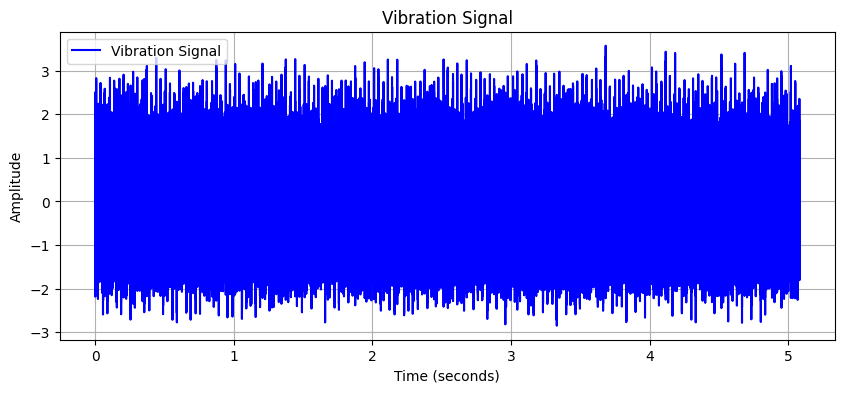

In [4]:
import matplotlib.pyplot as plt
# Define time axis (full signal)
sampling_rate = 48000  # Given sampling frequency (48 kHz)
time_full = np.arange(0, len(vib_DE)) / sampling_rate  # Convert samples to time in seconds
fs=48000 #hz
ts=1/fs

# Plot the full signal
plt.figure(figsize=(10, 4))
plt.plot(time_full, vib_DE, label="Vibration Signal", color='b')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Vibration Signal")
plt.legend()
plt.grid()
plt.show()

###b.2
To show signals from 2s-2.01s ,since we have 48000 signals in each second we just have to plot signals from $$2 \times 48K  -  2.01 \times 48K$$ or we can write an if that calculated the signal time and plot it wether its in the desired range or not:

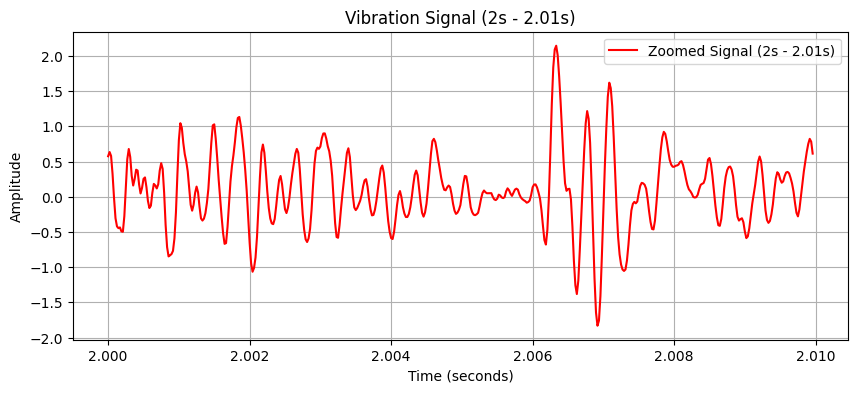

In [5]:
# Define time range for zoom-in (2s to 2.01s)
start_time = 2  # Start at 2s
end_time = 2.01  # End at 2.01s

# Find the corresponding indices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Extract the portion of signal within the given time range
time_zoom = time_full[start_index:end_index]
vib_zoom = vib_DE[start_index:end_index]

# Plot the zoomed-in signal
plt.figure(figsize=(10, 4))
plt.plot(time_zoom, vib_zoom, label="Zoomed Signal (2s - 2.01s)", color='r')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Vibration Signal (2s - 2.01s)")
plt.legend()
plt.grid()
plt.show()



$$\large \text{part c:} \hspace{110mm} \large \text{:بخش ج}$$
$$\large \text{Frequency analysis} $$
###c.1
First we write a function with inputs signal and fs (sampling rate), and using fft we plot frequency spectrum of signal
###c.2
then we can easily find dominant frequency and its magnitude from our array and then print it.

below is the function that returns the frequency spectrum along with the dominant frequency:

<ipython-input-6-820f5944f133>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dominant_magnitude = float(fft_magnitude[np.argmax(fft_magnitude)])


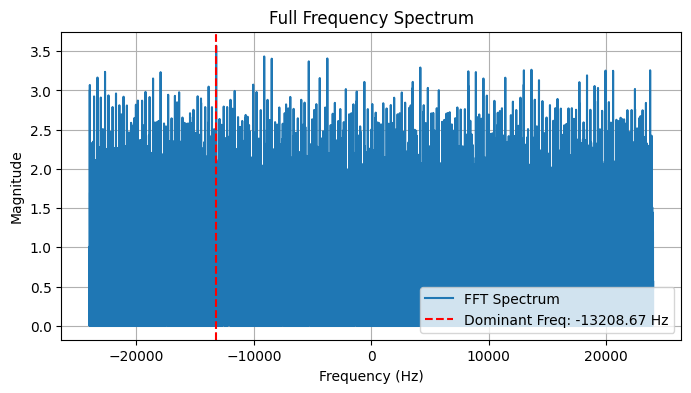

Dominant Frequency: -13208.67 Hz
Dominant Frequency Magnitude: 3.57


(-13208.667776238226, 3.569452)

In [6]:

def frequency_spectrum(signal, fs):
    N = len(signal)  # Number of samples

    # Compute FFT
    fft_values = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_values)  # Magnitude of FFT
    # Extract only a single value from the array


    # Print with proper formatting

    # Generate full frequency axis
    freqs = np.fft.fftfreq(N, d=1/fs)  # Frequency bins (including negative freqs)
    # Find dominant mag
    dominant_magnitude = float(fft_magnitude[np.argmax(fft_magnitude)])
    # Find dominant frequency (ignoring negative sign)
    dominant_freq = freqs[np.argmax(fft_magnitude)]


    # Plot the full FFT spectrum
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, fft_magnitude, label="FFT Spectrum")
    plt.axvline(dominant_freq, color='r', linestyle='--', label=f"Dominant Freq: {dominant_freq:.2f} Hz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Full Frequency Spectrum")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    # Print dominant frequency and its magnitude
    print(f"Dominant Frequency: {dominant_freq:.2f} Hz")
    print(f"Dominant Frequency Magnitude: {dominant_magnitude:.2f}")

    return  dominant_freq , dominant_magnitude #you can add these too: freqs, fft_magnitude

# Run the function with a real signal
frequency_spectrum(vib_DE, fs)


$$\large \text{part d:} \hspace{110mm} \large \text{:بخش د}$$
$$\large \text{Signal segmentation} $$
###d.1
after creating the numpy array we squeeze it to remove the third dimension with value 1, so instead of a 3D array behaving like a 2D, we would have a 2D segmented signal in a numpy array.at the end we print the segmented signal shape:


In [7]:
def segment_signal(signal, segment_size=128, overlap=10):
    """
    Splits the signal into overlapping segments and stores them in a NumPy array.

    Parameters:
        signal (numpy array): Input signal.
        segment_size (int): Size of each segment (default 128).
        overlap (int): Overlap between segments (default 64).

    Returns:
        numpy array: Segmented signal (each row is a segment).
    """
    step = segment_size - overlap  # Compute the step size
    num_segments = (len(signal) - overlap) // step  # Calculate number of segments

    # Create an array to store segments
    segments = np.array([signal[i : i + segment_size] for i in range(0, len(signal) - segment_size + 1, step)])
    segmented_signal = np.squeeze(segments)  # Removes extra dimensions
    return segmented_signal


segmented_signal = segment_signal(vib_DE, segment_size=128, overlap=10)
print(segmented_signal.shape)  # (number_of_segments, 128)

(2067, 128)



$$\large \text{part e:} \hspace{110mm} \large \text{:بخش ه}$$
$$\large \text{Signal segmentation ⅠⅠ} $$
###e.1
First, we save the data into a Data Frame and print some of its rows
###e.2
for this part because the question said use one for loop to do all,We first used one for loop to calculate segments and plots them and after that we chose 10 random numbers that are multiplications of the 13 and plotted those segments as the question defined in case of misunderstood.

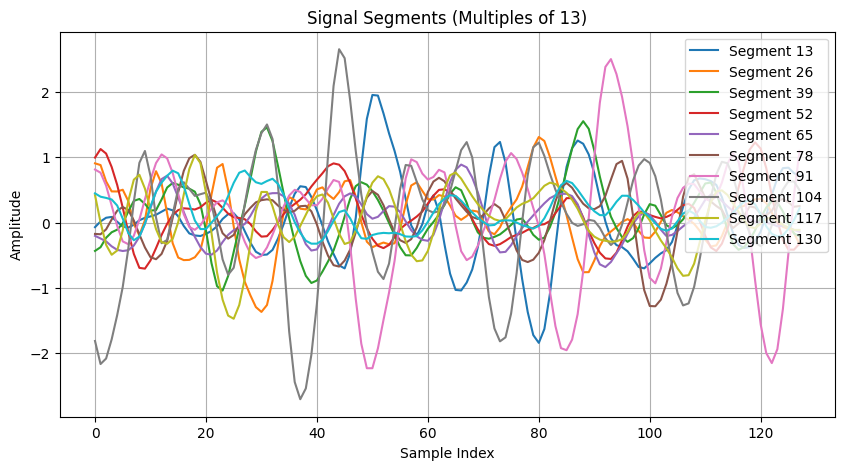

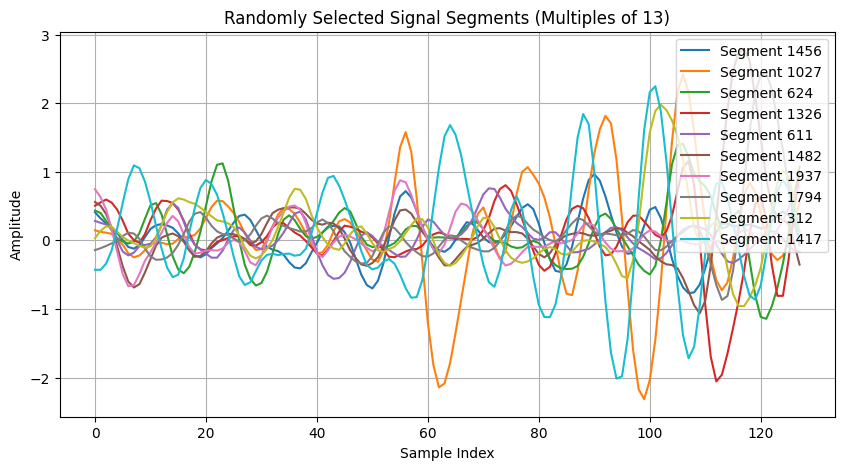

In [8]:
##e.1
# Convert to DataFrame
df = pd.DataFrame(segmented_signal)
df


##e.2
plt.figure(figsize=(10, 5))

for idx in [i * 13 for i in range(1, 11) if i * 13 < len(df)]:  # Select & filter indices in one step
    plt.plot(df.iloc[idx], label=f'Segment {idx}', linewidth=1.5)

# ✅ Final formatting
plt.xlabel("Sample Index"), plt.ylabel("Amplitude"), plt.title("Signal Segments (Multiples of 13)")
plt.legend(loc='upper right'), plt.grid(), plt.show()

# Randomly choose 10 unique numbers to multiply by 13
num_segments = 10
max_index = len(segmented_signal) // 13  # Ensure we stay within bounds
random_numbers = np.random.choice(range(1, max_index), num_segments, replace=False)  # Unique numbers
selected_indices = [13 * num for num in random_numbers]  # Multiply by 13

# Ensure indices are within range
selected_indices = [idx for idx in selected_indices if idx < len(segmented_signal)]

# Plot the selected segments
plt.figure(figsize=(10, 5))

for i, idx in enumerate(selected_indices):
    plt.plot(segmented_signal[idx], label=f'Segment {idx}', linewidth=1.5)

plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Randomly Selected Signal Segments (Multiples of 13)")
plt.legend(loc='upper right')
plt.grid()
plt.show()





$$\large \text{part f:} \hspace{110mm} \large \text{:بخش و}$$
$$\large \text{Feature Extraction} $$
###f.1
First, we define the function to calculate features of a signal
###f.2
using the function we calculate all features of our segments and save it in a df file.
###f.3
Finally we save the results in a csv file and we show a breif part of the segments with their features.

In [9]:
#f.1
# Step 1: Define a function to compute signal statistics
def compute_signal_features(signal):
    """
    Computes mean, standard deviation, and root mean square (RMS) for a given signal.
    """
    mean = np.mean(signal)                     # Compute Mean
    std_dev = np.std(signal)                   # Compute Standard Deviation
    rms = np.sqrt(np.mean(signal ** 2))        # Compute Root Mean Square (RMS)

    return mean, std_dev, rms
#f.2
# Step 2: Compute features for each segment
results = [compute_signal_features(segment) for segment in segmented_signal]

# Step 3: Convert results into a DataFrame
df_stat = pd.DataFrame(results, columns=["Mean", "Standard Deviation", "RMS"])

#f.3
# Step 4: Save DataFrame to CSV
csv_filename = "segmented_signal_statistics.csv"
df_stat.to_csv(csv_filename, index=False)

# Step 5: Display DataFrame in Colab
display(df_stat)
print(f"CSV file '{csv_filename}' saved successfully!")
# Step 6: Provide download link
from google.colab import files
files.download(csv_filename)



,Mean,Standard Deviation,RMS
0,0.093287,0.679569,0.685942
1,0.057207,0.697064,0.699408
2,0.080653,0.366588,0.375356
3,0.057540,0.872134,0.874030
4,0.089198,0.335796,0.347441
...,...,...,...
2062,0.052388,0.811131,0.812821
2063,0.032542,0.354657,0.356147
2064,0.077001,0.528279,0.533861
2065,0.039924,0.439399,0.441209


CSV file 'segmented_signal_statistics.csv' saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##ⅠⅠ Iris Dataset



$$\large \text{part a:} \hspace{110mm} \large \text{:بخش آ}$$
$$\large \text{Initial Review} $$
###a.1
this dataset is about 150 sample of different Iris flowers divided into 3 kinds of Iris,each sample has 5 feature, petal lenght and width,sepal lenght and width and the specie (Iris Setosa-Iris Versicolor-Iris Virginica)
###a.2
The scukit-learn library has the dataset we should only read it from the library.
###a.3
using the prepared commands we divide the data into 2 portions of test and train.
###a.4
Then we add columns of Train and Test to the samples, so we know each sample is for what usage.
###a.5
Finally we concat the two dataframes of test and train together making a unified dataframe which has both datas of train and test with labels.

In [10]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dataset = datasets.load_iris()
Iris_data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
Iris_data['species'] = dataset.target
#Dividing Data to train and test:
train_data, test_data = train_test_split(Iris_data, test_size=0.2, random_state=4)
#Adding Label:
train_data['dataset'] = 'train'
test_data['dataset'] = 'test'
#Concatenating data:
df = pd.concat([train_data, test_data])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,dataset
84,5.4,3.0,4.5,1.5,1,train
47,4.6,3.2,1.4,0.2,0,train
108,6.7,2.5,5.8,1.8,2,train
1,4.9,3.0,1.4,0.2,0,train
93,5.0,2.3,3.3,1.0,1,train



$$\large \text{part b:} \hspace{110mm} \large \text{:بخش ب}$$
$$\large \text{Visual Analysis} $$
###b.1
First we choose petals lenght and width to scatter them in a 2D plot.
###b.2
Now we add sepal lenght to the existing 2 feature to scatter a 3D plot.



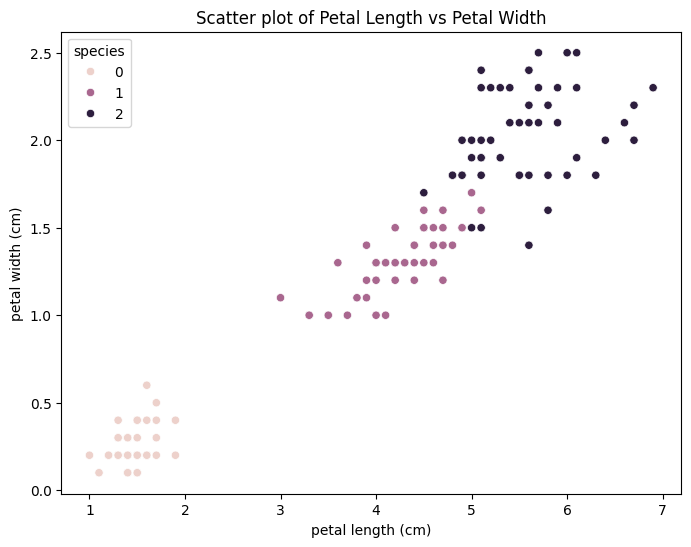

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['species'])
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.show()

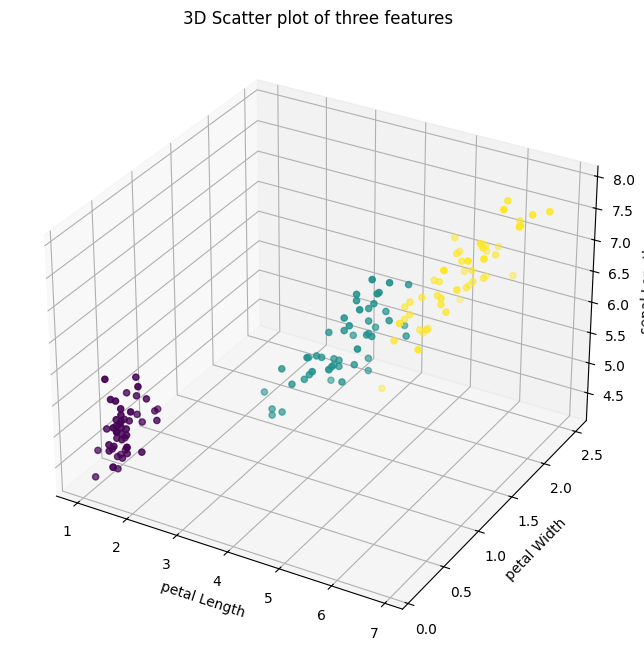

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['petal length (cm)'], df['petal width (cm)'], df['sepal length (cm)'], c=df['species'])
ax.set_xlabel('petal Length')
ax.set_ylabel('petal Width')
ax.set_zlabel('sepal Length')
plt.title('3D Scatter plot of three features')
plt.show()

###b.3
We plot the Heatmap using correlations of the features from seaborn library.


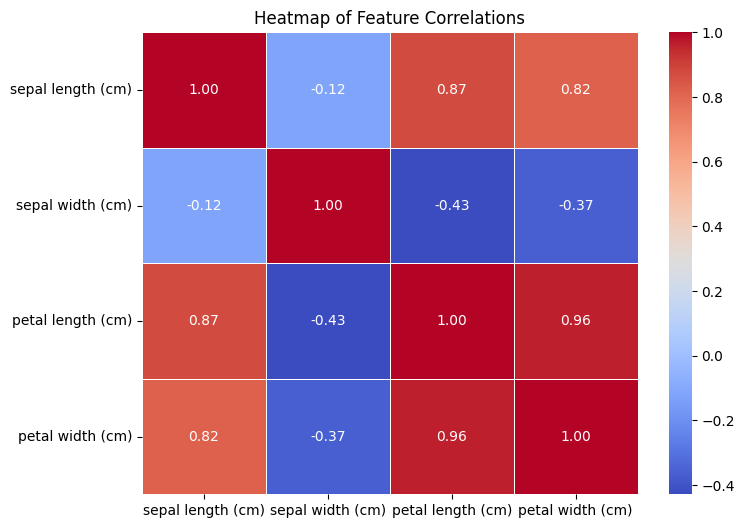

In [14]:

# Compute correlation matrix
corr_matrix = df.drop(columns=['species', 'dataset']).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Feature Correlations")
plt.show()

###b.4
Then we plot the Probability Density of each feature for both its train and test data using seaborn library.

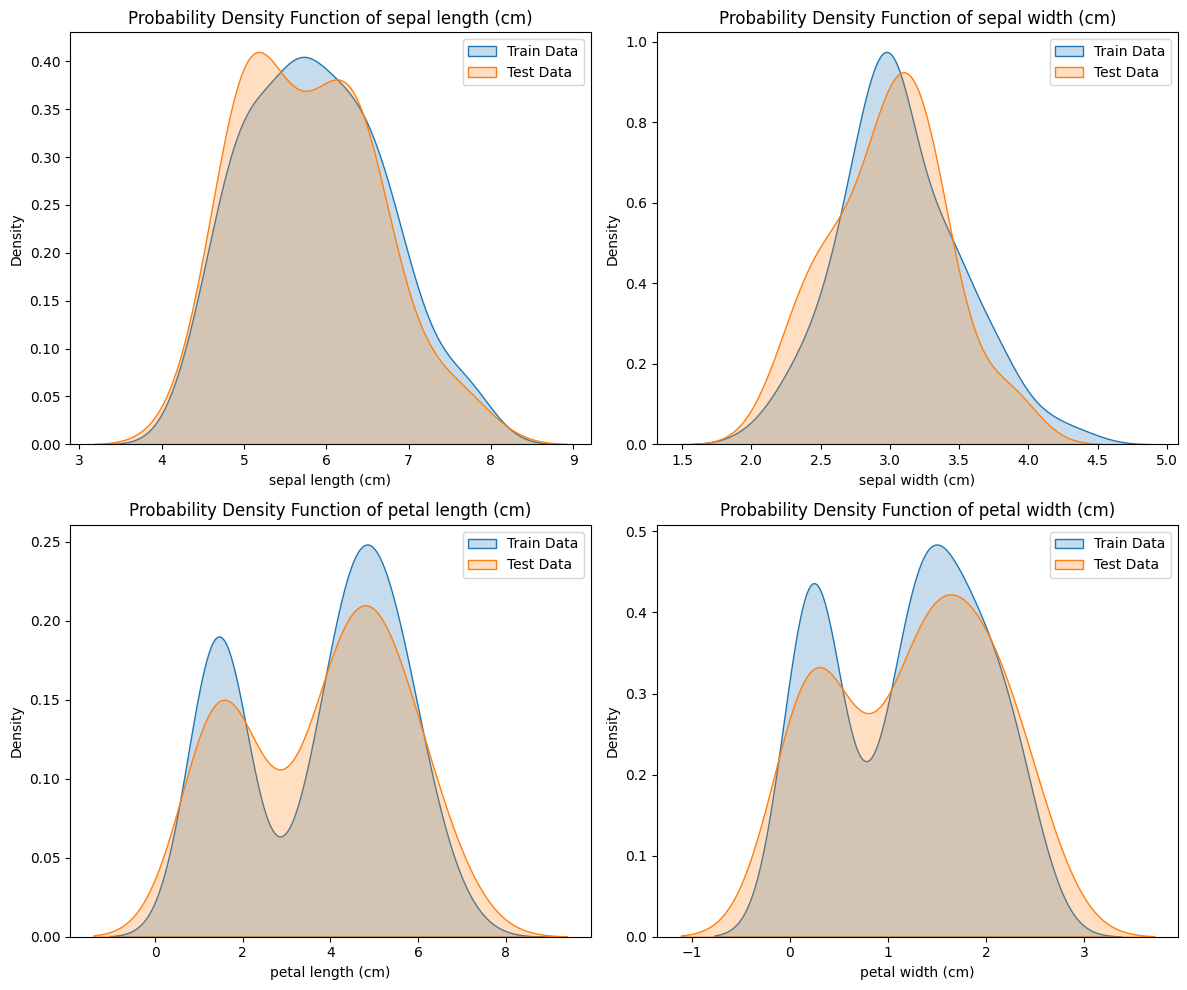

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset from scikit-learn
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Ensure proper feature names
df["species"] = iris.target

# Split dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4, stratify=df["species"])

# Correctly extract feature names
features = df.columns[:-1]  # Exclude 'species' column

# Plot PDFs for all four features
plt.figure(figsize=(12, 10))  # Set overall figure size

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.kdeplot(train_df[feature], label="Train Data", fill=True, )
    sns.kdeplot(test_df[feature], label="Test Data", fill=True,)

    plt.title(f"Probability Density Function of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


:
$$\large \text{part c:} \hspace{110mm} \large \text{:بخش ج}$$
$$\large \text{Continuity discretization} $$
###c.1
In this part we choose the petal lenght to discretize, dividing the petal lenght into 3 ranges of short medium and long based on the petal lenght in cm:
(petal min-2.5 for short, 2.5-5 for medium and 5-petal max for long)

In [16]:

# Choose the numerical feature for discretization
feature = "petal length (cm)"
# Define bin edges and labels for discretization
def discretize_feature(df, feature, bins, labels):
    df[f'{feature}_category'] = pd.cut(df[feature], bins=bins, labels=labels,)
discretize_feature(df, feature, bins=[df[feature].min(),2.5, 5,df[feature].max()], labels=['Short', 'Medium', 'Long'])


# Display first few rows
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal length (cm)_category
0,5.1,3.5,1.4,0.2,0,Short
1,4.9,3.0,1.4,0.2,0,Short
2,4.7,3.2,1.3,0.2,0,Short
3,4.6,3.1,1.5,0.2,0,Short
4,5.0,3.6,1.4,0.2,0,Short


Here we also plotted a histogram to show the numbers pf each lenght class in their petal lenght range:

<ipython-input-17-96bb1d00b2c5>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


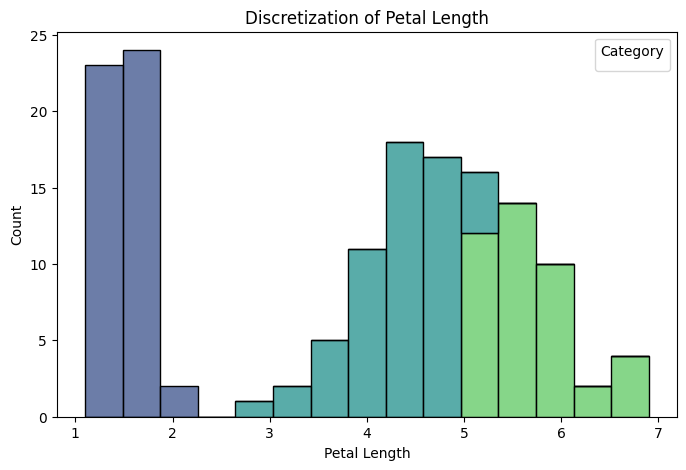

In [17]:

plt.figure(figsize=(8, 5))
sns.histplot(df, x="petal length (cm)", hue="petal length (cm)_category", multiple="stack", bins=15, palette="viridis")
plt.title("Discretization of Petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

:
$$\large \text{part d:} \hspace{110mm} \large \text{:بخش د}$$
$$\large \text{Statistical Analysis} $$
###d.1
Finally using .describe we show the statistic features of Our iris dataframe for specie 0 which is setosa:

In [18]:
setosa_stats = df[df['species'] == 0].describe()
print(setosa_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  species  
count         50.000000     50.0  
mean           0.246000      0.0  
std            0.105386      0.0  
min            0.100000      0.0  
25%            0.200000      0.0  
50%            0.200000      0.0  
75%            0.300000      0.0  
max            0.600000      0.0  
